In [1]:
#First step is to import important libraries or modules
import numpy as np 
import pandas as pd

np.random.seed(12345)
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(10, 6))
plt.style.use(style='ggplot')
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)


from datetime import datetime

from pandas.tools.plotting import autocorrelation_plot
import seaborn as sns

In [2]:
#Loading the apple file to data frame to analyize the column data
aapl_df=pd.read_csv('3250_Assignment+3_aapl.csv')
aapl_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-02-28,63.435715,63.981430,63.057144,63.057144,47.371712,80628800
1,2013-03-01,62.571430,62.597141,61.425713,61.495716,46.198692,138112100
2,2013-03-04,61.114285,61.171429,59.857143,60.007141,45.080402,145688900
3,2013-03-05,60.211430,62.169998,60.107143,61.591427,46.270584,159608400
4,2013-03-06,62.072857,62.178570,60.632858,60.808571,45.682465,115062500


In [3]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
Date         1260 non-null object
Open         1260 non-null float64
High         1260 non-null float64
Low          1260 non-null float64
Close        1260 non-null float64
Adj Close    1260 non-null float64
Volume       1260 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In the above info we can see that date is not the index and also the type of 'Date' column is object.

In [4]:
type(aapl_df.Date[0])

str

To verify it, I have checked the dtype of first element which clearly shows that it is a string type.<br/>
Date can be set as index and also while creating a df we can specify parse_date method of read_csv to treat Date column as date type as shown below:

In [5]:
aapl_df=pd.read_csv('3250_Assignment+3_aapl.csv',parse_dates=["Date"], index_col="Date")
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-02-28,63.435715,63.981430,63.057144,63.057144,47.371712,80628800
2013-03-01,62.571430,62.597141,61.425713,61.495716,46.198692,138112100
2013-03-04,61.114285,61.171429,59.857143,60.007141,45.080402,145688900
2013-03-05,60.211430,62.169998,60.107143,61.591427,46.270584,159608400
2013-03-06,62.072857,62.178570,60.632858,60.808571,45.682465,115062500


In [6]:
aapl_df=aapl_df.drop(pd.Timestamp('2013-02-28'))

In the above statement, the first row of data has been dropped as it only represent the last day of Feb 28, 2013. After removing this we will have complete 60 months to analyze. Otherwise it was considering Feb as a complete month whereas data for Feb was not available except for the 28th.

In [7]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-03-01 to 2018-02-28
Data columns (total 6 columns):
Open         1259 non-null float64
High         1259 non-null float64
Low          1259 non-null float64
Close        1259 non-null float64
Adj Close    1259 non-null float64
Volume       1259 non-null int64
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [8]:
aapl_df.index

DatetimeIndex(['2013-03-01', '2013-03-04', '2013-03-05', '2013-03-06',
               '2013-03-07', '2013-03-08', '2013-03-11', '2013-03-12',
               '2013-03-13', '2013-03-14',
               ...
               '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-20',
               '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-26',
               '2018-02-27', '2018-02-28'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

From the index info above, it shows that there is no set frequency in the data. Also, the dates for weekend are missing as stock market is closed on weekends and holidays.

In [9]:
aapl_df['2017-07']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-03,144.880005,145.300003,143.100006,143.500000,141.848343,14258300
2017-07-05,143.690002,144.789993,142.720001,144.089996,142.431549,21569600
2017-07-06,143.020004,143.500000,142.410004,142.729996,141.087204,24128800
2017-07-07,142.899994,144.750000,142.899994,144.179993,142.520508,19201700
2017-07-10,144.110001,145.949997,143.369995,145.059998,143.390381,21090600
2017-07-11,144.729996,145.850006,144.380005,145.529999,143.854965,19781800
2017-07-12,145.869995,146.179993,144.820007,145.740005,144.062561,24884500
2017-07-13,145.500000,148.490005,145.440002,147.770004,146.069214,25199400
2017-07-14,147.970001,149.330002,147.330002,149.039993,147.324570,20132100


To Validate the holiday data is missing, above data for month of July has been pulled and data for 4th of July is missing even though it does not fall on a weekend. It was Tuesday. So to make the data more consistent, I am going to set Frequency as 'D' and using pad method to fill the NA values that will be generated when we change the frequency. Why pad method - because if price of a stock is x on Friday, it will change only on Monday. During Saturday and Sunday there is no change in the price so we can assume that the price of stock over the weekend or on a holiday is same as previous business day. <br/>

To do that asfreq method has been implemented as below:

In [10]:
aapl_df=aapl_df.asfreq('D',method='pad')

In [11]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-03-01 to 2018-02-28
Freq: D
Data columns (total 6 columns):
Open         1826 non-null float64
High         1826 non-null float64
Low          1826 non-null float64
Close        1826 non-null float64
Adj Close    1826 non-null float64
Volume       1826 non-null int64
dtypes: float64(5), int64(1)
memory usage: 99.9 KB


In [12]:
aapl_df.index

DatetimeIndex(['2013-03-01', '2013-03-02', '2013-03-03', '2013-03-04',
               '2013-03-05', '2013-03-06', '2013-03-07', '2013-03-08',
               '2013-03-09', '2013-03-10',
               ...
               '2018-02-19', '2018-02-20', '2018-02-21', '2018-02-22',
               '2018-02-23', '2018-02-24', '2018-02-25', '2018-02-26',
               '2018-02-27', '2018-02-28'],
              dtype='datetime64[ns]', name='Date', length=1826, freq='D')

To select the adjusted monthend close price, I am going to create a new time series by frequency as 'M'. I am not choosing 'BM' as we have already filled the gaps above to cover weekends and Holidays. So, it should not matter as regular month end will have values assigned from business month end day.

In [13]:
aapl_adj_close_monthend=pd.Series(aapl_df['Adj Close'].asfreq('M'))
aapl_adj_close_monthend

Date
2013-03-31     47.506943
2013-04-30     47.519821
2013-05-31     50.594505
2013-06-30     44.609531
2013-07-31     50.909512
2013-08-31     57.449993
2013-09-30     56.215424
2013-10-31     61.633572
2013-11-30     68.345360
2013-12-31     68.953758
                 ...    
2017-05-31    151.001770
2017-06-30    142.362366
2017-07-31    147.018143
2017-08-31    162.749008
2017-09-30    152.944366
2017-10-31    167.750549
2017-11-30    171.152191
2017-12-31    168.542831
2018-01-31    166.750137
2018-02-28    178.119995
Freq: M, Name: Adj Close, Length: 60, dtype: float64

Below is the overall Lag plot for AAPL adjusted close monthend price to see what is the overall relation ship with Lag values:

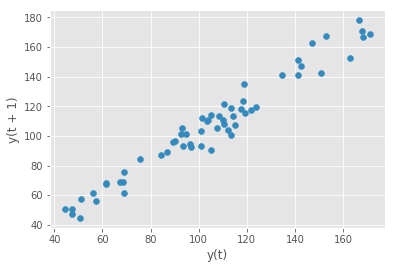

In [14]:
pd.plotting.lag_plot(aapl_adj_close_monthend)
plt.show()

Lag plot shows that there is a positive correlation as we see the data points forming a diagonal upwards line.To verify this further, below autocorrelation graph has been plotted

Text(0.5,0,'Lag (Months)')

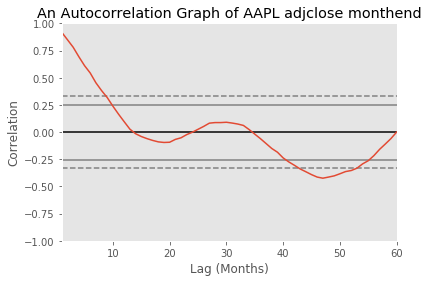

In [15]:
#autocorrelation plot
aCPlot = pd.plotting.autocorrelation_plot(aapl_adj_close_monthend)
aCPlot.set_title("An Autocorrelation Graph of AAPL adjclose monthend")
aCPlot.set_ylabel("Correlation")
aCPlot.set_xlabel("Lag (Months)")

The above Autocorrelation graph measures the relationship between Time Series and its Lag values. The following observations have been found:<br/>
 - When lag is less than 10 the autocorrelation is strong with coefficient value is closer to 1 and then slightly decreases to zero.
 - When lag is between 15- 40, there is no autocorrelation as the coefficient values are closer to zero and also within the dotted lines.
 - There is a negative correlation between lag values 43-53, however the autocorrelation is weak as with further lag values it is apporaching to zero

We can further validate this by ploting a lag graphs as below:

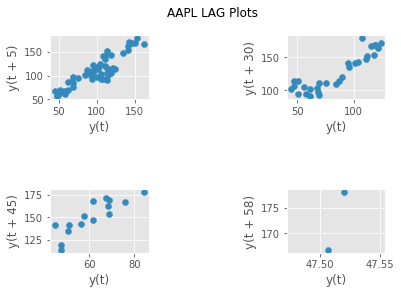

In [16]:
#lagplot of subsets of auto correlation
plt.subplot(3, 3, 1)
pd.plotting.lag_plot(series=aapl_adj_close_monthend, lag = 5)
plt.subplot(3, 3, 3)
pd.plotting.lag_plot(series=aapl_adj_close_monthend, lag = 30)
plt.subplot(3, 3, 7)
pd.plotting.lag_plot(series=aapl_adj_close_monthend, lag = 45)
plt.subplot(3, 3, 9)
pd.plotting.lag_plot(series=aapl_adj_close_monthend, lag = 58)
plt.suptitle('AAPL LAG Plots')
plt.show()

After observing the subset of Autocorrelation, the finding on different subsets are as follows:<br/>
 - Graph 1 - There is a strong correlation when the values are below 10.
 - Graph 2 and 3 - From Autocorrelation graph, my understanding was there is no correlation. However, looking at the subset graph. It does show some correlation which is weak but we can not say it is completely zero.
 - Graph 4 - There is no correlation as the lag values approaces towardss end.

Moving on the the next task, finding a **monthly return** from monthend stock prices is calculated as - <br/>
aapl_adj_close_monthend / aapl_adj_close_monthend.shift(1) - 1

In [17]:
aapl_monthly_return=aapl_adj_close_monthend/aapl_adj_close_monthend.shift(1)-1

In [18]:
aapl_monthly_return

Date
2013-03-31         NaN
2013-04-30    0.000271
2013-05-31    0.064703
2013-06-30   -0.118293
2013-07-31    0.141225
2013-08-31    0.128473
2013-09-30   -0.021489
2013-10-31    0.096382
2013-11-30    0.108898
2013-12-31    0.008902
                ...   
2017-05-31    0.067808
2017-06-30   -0.057214
2017-07-31    0.032704
2017-08-31    0.106999
2017-09-30   -0.060244
2017-10-31    0.096808
2017-11-30    0.020278
2017-12-31   -0.015246
2018-01-31   -0.010636
2018-02-28    0.068185
Freq: M, Name: Adj Close, Length: 60, dtype: float64

In [19]:
aapl_monthly_return=aapl_monthly_return.dropna() #simply dropping the NA values that were noticed as above

In [20]:
aapl_monthly_return

Date
2013-04-30    0.000271
2013-05-31    0.064703
2013-06-30   -0.118293
2013-07-31    0.141225
2013-08-31    0.128473
2013-09-30   -0.021489
2013-10-31    0.096382
2013-11-30    0.108898
2013-12-31    0.008902
2014-01-31   -0.107697
                ...   
2017-05-31    0.067808
2017-06-30   -0.057214
2017-07-31    0.032704
2017-08-31    0.106999
2017-09-30   -0.060244
2017-10-31    0.096808
2017-11-30    0.020278
2017-12-31   -0.015246
2018-01-31   -0.010636
2018-02-28    0.068185
Freq: M, Name: Adj Close, Length: 59, dtype: float64

Next step is to plot the Autocorrelation for AAPL returns.

Text(0.5,0,'Lag (Months)')

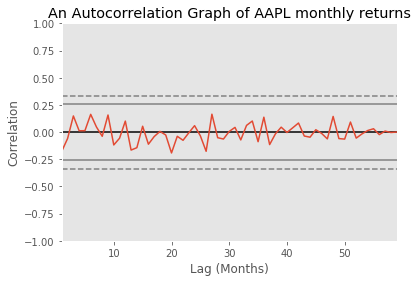

In [21]:
#autocorrelation plot
aCPlot = pd.plotting.autocorrelation_plot(aapl_monthly_return)
aCPlot.set_title("An Autocorrelation Graph of AAPL monthly returns")
aCPlot.set_ylabel("Correlation")
aCPlot.set_xlabel("Lag (Months)")

The Autocorrelation graph shows that correlation coeffcient of monthly return values is closer to zero. So, there is no autocorrelation. However, to verify this I am going to draw a lag plot as below

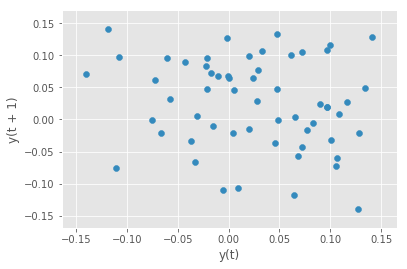

In [22]:
pd.plotting.lag_plot(aapl_monthly_return)
plt.show()

The Lag plot of AAPL monthly return is a scattered plot, so it is clear that there is no autocorrelation between monthly returns. This is called White noise.

The same process as above to be applied to AMZN,EBAY and INTC one by one. 

To start with loading files into data frame and setting date as index.

### AMZN

In [23]:
amzn_df=pd.read_csv('3250_Assignment+3_amzn.csv',parse_dates=["Date"], index_col="Date")
amzn_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2013-02-28 to 2018-02-28
Data columns (total 6 columns):
Open         1260 non-null float64
High         1260 non-null float64
Low          1260 non-null float64
Close        1260 non-null float64
Adj Close    1260 non-null float64
Volume       1260 non-null int64
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [24]:
amzn_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-02-28,261.809998,267.000000,260.630005,264.269989,264.269989,2667200
2013-03-01,263.269989,266.600006,261.040009,265.739990,265.739990,2957000
2013-03-04,265.359985,273.299988,264.140015,273.109985,273.109985,3453000
2013-03-05,274.000000,276.679993,269.989990,275.589996,275.589996,3686200
2013-03-06,275.760010,276.489990,271.829987,273.790009,273.790009,2050700


In [25]:
#dropping the first date row which is Feb 28, 2013
amzn_df=amzn_df.drop(pd.Timestamp('2013-02-28'))

In [26]:
amzn_df.index

DatetimeIndex(['2013-03-01', '2013-03-04', '2013-03-05', '2013-03-06',
               '2013-03-07', '2013-03-08', '2013-03-11', '2013-03-12',
               '2013-03-13', '2013-03-14',
               ...
               '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-20',
               '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-26',
               '2018-02-27', '2018-02-28'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [27]:
# to set the frequency and to fill the gaps for AMZN
amzn_df=amzn_df.asfreq('D',method='pad')

In [28]:
amzn_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-03-01 to 2018-02-28
Freq: D
Data columns (total 6 columns):
Open         1826 non-null float64
High         1826 non-null float64
Low          1826 non-null float64
Close        1826 non-null float64
Adj Close    1826 non-null float64
Volume       1826 non-null int64
dtypes: float64(5), int64(1)
memory usage: 99.9 KB


In [29]:
amzn_df.index

DatetimeIndex(['2013-03-01', '2013-03-02', '2013-03-03', '2013-03-04',
               '2013-03-05', '2013-03-06', '2013-03-07', '2013-03-08',
               '2013-03-09', '2013-03-10',
               ...
               '2018-02-19', '2018-02-20', '2018-02-21', '2018-02-22',
               '2018-02-23', '2018-02-24', '2018-02-25', '2018-02-26',
               '2018-02-27', '2018-02-28'],
              dtype='datetime64[ns]', name='Date', length=1826, freq='D')

In [30]:
#amzn month end adj close price
amzn_adj_close_monthend=pd.Series(amzn_df['Adj Close'].asfreq('M'))
amzn_adj_close_monthend

Date
2013-03-31     266.489990
2013-04-30     253.809998
2013-05-31     269.200012
2013-06-30     277.690002
2013-07-31     301.220001
2013-08-31     280.980011
2013-09-30     312.640015
2013-10-31     364.029999
2013-11-30     393.619995
2013-12-31     398.790009
                 ...     
2017-05-31     994.619995
2017-06-30     968.000000
2017-07-31     987.780029
2017-08-31     980.599976
2017-09-30     961.349976
2017-10-31    1105.280029
2017-11-30    1176.750000
2017-12-31    1169.469971
2018-01-31    1450.890015
2018-02-28    1512.449951
Freq: M, Name: Adj Close, Length: 60, dtype: float64

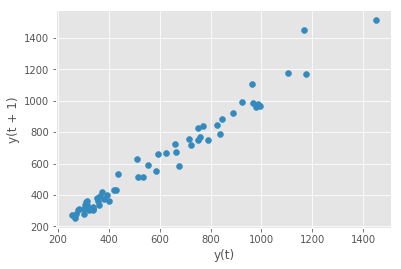

In [31]:
#overlall lag plot for AMZN monthend close prices
pd.plotting.lag_plot(amzn_adj_close_monthend)
plt.show()

The above graph shows there is a correlation when lag is less, as the lag increases-data starts to scatter means less correlation.<br/>
To see, below autocorrelation graph has been plotted:

Text(0.5,0,'Lag (Months)')

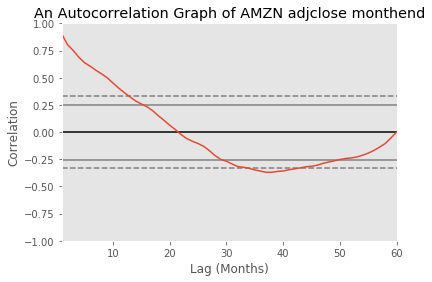

In [32]:
#autocorrelation plot
aCPlot = pd.plotting.autocorrelation_plot(amzn_adj_close_monthend)
aCPlot.set_title("An Autocorrelation Graph of AMZN adjclose monthend")
aCPlot.set_ylabel("Correlation")
aCPlot.set_xlabel("Lag (Months)")

The above graph shows there is strong Autocorrelation when the lag is less than 15. As the lag increases the correlation decreases. There is some negative autocorrelation when the lag is 37 or 38 but we can say it is weak. <br/>

Let's look at some of the subsets of Lags

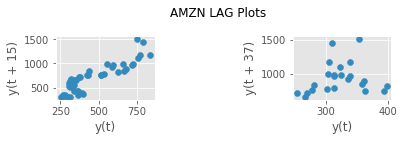

In [33]:
#lagplot of subsets of auto correlation
plt.subplot(3, 3, 1)
pd.plotting.lag_plot(series=amzn_adj_close_monthend, lag = 15)
plt.subplot(3, 3, 3)
pd.plotting.lag_plot(series=amzn_adj_close_monthend, lag = 37)
plt.suptitle('AMZN LAG Plots')
plt.show()

The lag first lag plot shows somewhat pattern how ever the second graph shows scattered data which means no correlation.<br/>

The next step is to calculate monthly returns, from the previous aapl calculation I noticed there are NA values from the previous month so I will be dropping Na value in the first step it self.


In [34]:
amzn_monthly_return=(amzn_adj_close_monthend/amzn_adj_close_monthend.shift(1)-1).dropna()
amzn_monthly_return

Date
2013-04-30   -0.047581
2013-05-31    0.060636
2013-06-30    0.031538
2013-07-31    0.084735
2013-08-31   -0.067193
2013-09-30    0.112677
2013-10-31    0.164374
2013-11-30    0.081284
2013-12-31    0.013135
2014-01-31   -0.100554
                ...   
2017-05-31    0.075276
2017-06-30   -0.026764
2017-07-31    0.020434
2017-08-31   -0.007269
2017-09-30   -0.019631
2017-10-31    0.149717
2017-11-30    0.064662
2017-12-31   -0.006187
2018-01-31    0.240639
2018-02-28    0.042429
Freq: M, Name: Adj Close, Length: 59, dtype: float64

Text(0.5,0,'Lag (Months)')

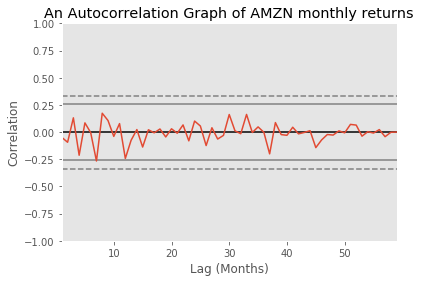

In [35]:
#autocorrelation plot of AMZN returns
aCPlot = pd.plotting.autocorrelation_plot(amzn_monthly_return)
aCPlot.set_title("An Autocorrelation Graph of AMZN monthly returns")
aCPlot.set_ylabel("Correlation")
aCPlot.set_xlabel("Lag (Months)")

The above graph clearly shows that there is no correlation between the montly returns of AMZN as the pattern is inside grey lines and closer to zero. <br/>

Next to look into Ebay data.

### EBAY

In [36]:
ebay_df=pd.read_csv('3250_Assignment+3_ebay.csv',parse_dates=["Date"], index_col="Date")
ebay_df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-02-28,43.22,43.420,42.850,42.86,8344453.0,0.0,1.0,43.22,43.420,42.850,42.86,8344453.0
2018-02-27,43.82,43.950,43.130,43.15,9152950.0,0.0,1.0,43.82,43.950,43.130,43.15,9152950.0
2018-02-26,43.80,44.360,43.650,43.83,6366809.0,0.0,1.0,43.80,44.360,43.650,43.83,6366809.0
2018-02-23,43.27,43.785,42.815,43.68,11101710.0,0.0,1.0,43.27,43.785,42.815,43.68,11101710.0
2018-02-22,43.16,43.510,42.620,42.83,9534700.0,0.0,1.0,43.16,43.510,42.620,42.83,9534700.0


In the above data frame head, the date starts with the 2018 that means it is not sorted. I am going to sort the date by sort_index method.

In [37]:
ebay_df=ebay_df.sort_index()

In [38]:
ebay_df.index

DatetimeIndex(['2013-02-28', '2013-03-01', '2013-03-04', '2013-03-05',
               '2013-03-06', '2013-03-07', '2013-03-08', '2013-03-11',
               '2013-03-12', '2013-03-13',
               ...
               '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-20',
               '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-26',
               '2018-02-27', '2018-02-28'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [39]:
ebay_df=ebay_df.drop(pd.Timestamp('2013-02-28'))

In [40]:
ebay_df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2013-03-01,54.59,55.095,54.02,54.90,6422900.0,0.0,1.0,21.476593,21.675268,21.252345,21.598552,6422900.0
2013-03-04,54.34,55.490,54.25,55.48,9750900.0,0.0,1.0,21.378238,21.830667,21.342831,21.826733,9750900.0
2013-03-05,55.55,56.000,54.76,55.26,9812600.0,0.0,1.0,21.854272,22.031309,21.543473,21.740181,9812600.0
2013-03-06,54.98,55.000,53.44,53.57,14560300.0,0.0,1.0,21.630025,21.637893,21.024164,21.075308,14560300.0
2013-03-07,53.69,53.870,52.75,52.98,9450000.0,0.0,1.0,21.122518,21.193333,20.752707,20.843192,9450000.0


In [41]:
#setting up the frequency to Day and filling missing values
ebay_df=ebay_df.asfreq('D',method='pad')

In [42]:
ebay_df.index

DatetimeIndex(['2013-03-01', '2013-03-02', '2013-03-03', '2013-03-04',
               '2013-03-05', '2013-03-06', '2013-03-07', '2013-03-08',
               '2013-03-09', '2013-03-10',
               ...
               '2018-02-19', '2018-02-20', '2018-02-21', '2018-02-22',
               '2018-02-23', '2018-02-24', '2018-02-25', '2018-02-26',
               '2018-02-27', '2018-02-28'],
              dtype='datetime64[ns]', name='Date', length=1826, freq='D')

In [43]:
#To find out monthe end prices for EBAY
ebay_adj_close_monthend=pd.Series(ebay_df['AdjClose'].asfreq('M'))
ebay_adj_close_monthend

Date
2013-03-31    21.331029
2013-04-30    20.611077
2013-05-31    21.283819
2013-06-30    20.347488
2013-07-31    20.335685
2013-08-31    19.666878
2013-09-30    21.950659
2013-10-31    20.736970
2013-11-30    19.875388
2013-12-31    21.584782
                ...    
2017-05-31    34.300000
2017-06-30    34.920000
2017-07-31    35.730000
2017-08-31    36.130000
2017-09-30    38.460000
2017-10-31    37.640000
2017-11-30    34.670000
2017-12-31    37.740000
2018-01-31    40.580000
2018-02-28    42.860000
Freq: M, Name: AdjClose, Length: 60, dtype: float64

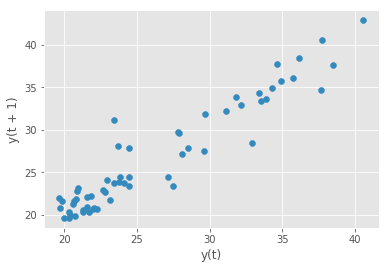

In [44]:
#Lag plot for month end prices of EBAY
pd.plotting.lag_plot(ebay_adj_close_monthend)
plt.show()

The above lag plot shows there is some what correlation as the data is clustered tight in the beginning as it moves up it is scattered.

Text(0.5,0,'Lag (Months)')

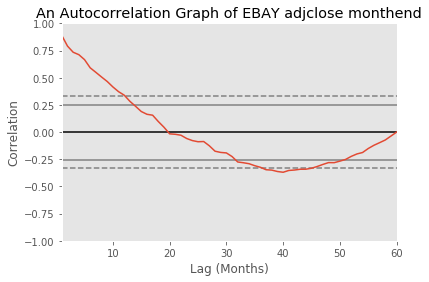

In [45]:
#autocorrelation plot for EBAY month end prices
aCPlot = pd.plotting.autocorrelation_plot(ebay_adj_close_monthend)
aCPlot.set_title("An Autocorrelation Graph of EBAY adjclose monthend")
aCPlot.set_ylabel("Correlation")
aCPlot.set_xlabel("Lag (Months)")

The Ebay graph for Autocorrelation is similar to AMZN.  It started with a high correlation and then decreases. So we can say more the lag less the correlation. <br/>
To verify, lag plot of subsets have been plotted:


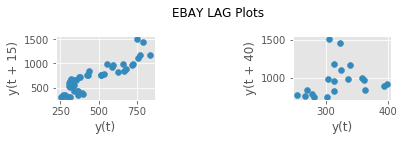

In [46]:
#lagplot of subsets of auto correlation
plt.subplot(3, 3, 1)
pd.plotting.lag_plot(series=amzn_adj_close_monthend, lag = 15)
plt.subplot(3, 3, 3)
pd.plotting.lag_plot(series=amzn_adj_close_monthend, lag = 40)
plt.suptitle('EBAY LAG Plots')
plt.show()

There is a some correlation in the first graph but no correlation in the second one. <Br/>

Next step is to calculate returns and droping NA for EBAY-

In [47]:
ebay_monthly_return=(ebay_adj_close_monthend/ebay_adj_close_monthend.shift(1)-1).dropna()
ebay_monthly_return

Date
2013-04-30   -0.033751
2013-05-31    0.032640
2013-06-30   -0.043993
2013-07-31   -0.000580
2013-08-31   -0.032888
2013-09-30    0.116123
2013-10-31   -0.055292
2013-11-30   -0.041548
2013-12-31    0.086006
2014-01-31   -0.030347
                ...   
2017-05-31    0.026946
2017-06-30    0.018076
2017-07-31    0.023196
2017-08-31    0.011195
2017-09-30    0.064489
2017-10-31   -0.021321
2017-11-30   -0.078905
2017-12-31    0.088549
2018-01-31    0.075252
2018-02-28    0.056185
Freq: M, Name: AdjClose, Length: 59, dtype: float64

Text(0.5,0,'Lag (Months)')

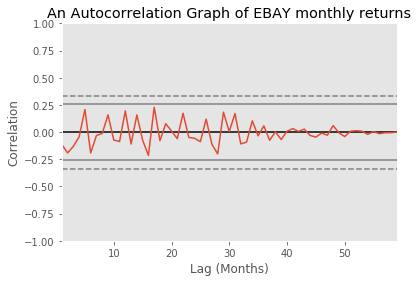

In [48]:
#Autocorrelation plot for monthly returns of EBAY
aCPlot = pd.plotting.autocorrelation_plot(ebay_monthly_return)
aCPlot.set_title("An Autocorrelation Graph of EBAY monthly returns")
aCPlot.set_ylabel("Correlation")
aCPlot.set_xlabel("Lag (Months)")

The above graph shows that there is no correlation or very minor in the beginning but that is negligible. So no autocorrelation in the monthly returns of EBAY. <br/><br/>
Next the last file to look at is INTC

### INTC

In [49]:
intc_df=pd.read_csv('3250_Assignment+3_INTC.csv',parse_dates=["Date"], index_col="Date")
intc_df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-02-28,50.18,50.34,49.280,49.29,33888511.0,0.0,1.0,50.18,50.34,49.280,49.29,33888511.0
2018-02-27,49.37,50.90,49.310,49.91,42654658.0,0.0,1.0,49.37,50.90,49.310,49.91,42654658.0
2018-02-26,48.20,49.13,48.100,49.11,25774143.0,0.0,1.0,48.20,49.13,48.100,49.11,25774143.0
2018-02-23,46.34,47.79,46.305,47.73,25243762.0,0.0,1.0,46.34,47.79,46.305,47.73,25243762.0
2018-02-22,46.14,46.56,45.620,45.80,16447235.0,0.0,1.0,46.14,46.56,45.620,45.80,16447235.0


This data has the same issue as ebay, we need to sort the index

In [50]:
intc_df=intc_df.sort_index()
intc_df.index

DatetimeIndex(['2013-02-28', '2013-03-01', '2013-03-04', '2013-03-05',
               '2013-03-06', '2013-03-07', '2013-03-08', '2013-03-11',
               '2013-03-12', '2013-03-13',
               ...
               '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-20',
               '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-26',
               '2018-02-27', '2018-02-28'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [51]:
#deleting the first row to ignore Feb 28, 2013
intc_df=intc_df.drop(pd.Timestamp('2013-02-28'))

In [52]:
#setting up the frequency to Day and filling missing values
intc_df=intc_df.asfreq('D',method='pad')
intc_df.index

DatetimeIndex(['2013-03-01', '2013-03-02', '2013-03-03', '2013-03-04',
               '2013-03-05', '2013-03-06', '2013-03-07', '2013-03-08',
               '2013-03-09', '2013-03-10',
               ...
               '2018-02-19', '2018-02-20', '2018-02-21', '2018-02-22',
               '2018-02-23', '2018-02-24', '2018-02-25', '2018-02-26',
               '2018-02-27', '2018-02-28'],
              dtype='datetime64[ns]', name='Date', length=1826, freq='D')

In [53]:
#getting the month end close price for INTC
intc_adj_close_monthend=pd.Series(intc_df['AdjClose'].asfreq('M'))
intc_adj_close_monthend

Date
2013-03-31    18.682986
2013-04-30    20.492673
2013-05-31    20.970127
2013-06-30    20.926943
2013-07-31    20.153950
2013-08-31    19.169991
2013-09-30    19.990690
2013-10-31    21.341659
2013-11-30    20.986885
2013-12-31    22.848766
                ...    
2017-05-31    35.426445
2017-06-30    33.101309
2017-07-31    34.798560
2017-08-31    34.663541
2017-09-30    37.638656
2017-10-31    44.962774
2017-11-30    44.840000
2017-12-31    46.160000
2018-01-31    48.140000
2018-02-28    49.290000
Freq: M, Name: AdjClose, Length: 60, dtype: float64

Text(0.5,0,'Lag (Months)')

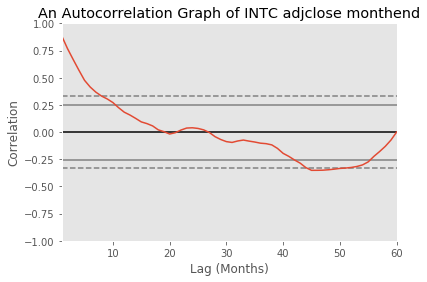

In [54]:
#autocorrelation plot for INTC month end prices
aCPlot = pd.plotting.autocorrelation_plot(intc_adj_close_monthend)
aCPlot.set_title("An Autocorrelation Graph of INTC adjclose monthend")
aCPlot.set_ylabel("Correlation")
aCPlot.set_xlabel("Lag (Months)")

The above graph depicts that INTC is also similar to EBAY and AMZN. There is a correlation if the lag values are less than 10. However, the overall correaltion is weak.

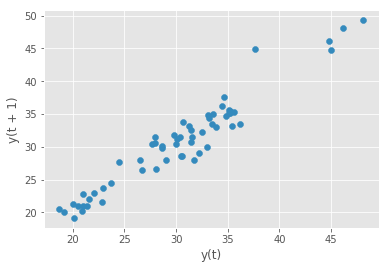

In [55]:
#overall lag plot just to observe if it gives the similar result of our expectation with some correlation in the beginning.
pd.plotting.lag_plot(intc_adj_close_monthend)
plt.show()


The next step is to calculate the monthly returns for INTC, the same method is implemented as that of AAPL,EBAY and AMZN.

In [56]:
intc_monthly_return=(intc_adj_close_monthend/intc_adj_close_monthend.shift(1)-1).dropna()
intc_monthly_return

Date
2013-04-30    0.096863
2013-05-31    0.023299
2013-06-30   -0.002059
2013-07-31   -0.036938
2013-08-31   -0.048822
2013-09-30    0.042812
2013-10-31    0.067580
2013-11-30   -0.016624
2013-12-31    0.088716
2014-01-31   -0.054517
                ...   
2017-05-31    0.006829
2017-06-30   -0.065633
2017-07-31    0.051274
2017-08-31   -0.003880
2017-09-30    0.085828
2017-10-31    0.194590
2017-11-30   -0.002731
2017-12-31    0.029438
2018-01-31    0.042894
2018-02-28    0.023889
Freq: M, Name: AdjClose, Length: 59, dtype: float64

Text(0.5,0,'Lag (Months)')

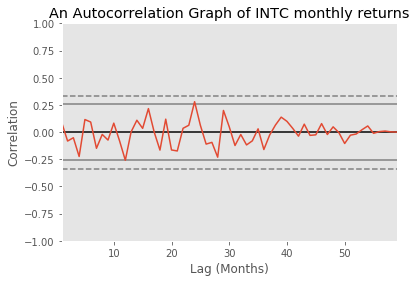

In [59]:
#Autocorrelation plot for monthly returns of INTC
aCPlot = pd.plotting.autocorrelation_plot(intc_monthly_return)
aCPlot.set_title("An Autocorrelation Graph of INTC monthly returns")
aCPlot.set_ylabel("Correlation")
aCPlot.set_xlabel("Lag (Months)")

The above graph of INTC monthly returns shows that there is no correlation because the corerrelation coefficient is closer to 0.
At certain points it is touching the solid grey line which is again close to zero so there is no correlation <Br/>

Just to look at the overall Lag plot of AMZN,EBAY and INTC Returns, expectation is a scattered data.

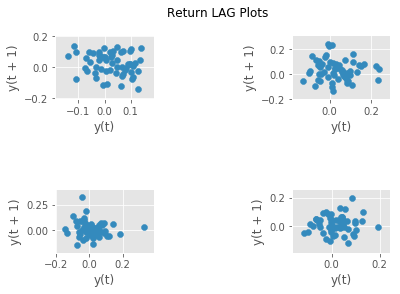

In [58]:
plt.subplot(3, 3, 1)
pd.plotting.lag_plot(series=aapl_monthly_return)
plt.subplot(3, 3, 3)
pd.plotting.lag_plot(series=amzn_monthly_return)
plt.subplot(3, 3, 7)
pd.plotting.lag_plot(series=ebay_monthly_return)
plt.subplot(3, 3, 9)
pd.plotting.lag_plot(series=intc_monthly_return)
plt.suptitle('Return LAG Plots')
plt.show()

The lag plot of mothly returns is scattered. So there is no correaltion between the monthly returns of the four stocks.